<a href="https://colab.research.google.com/github/hdpark1208/StudyCode/blob/main/Algorithm/PG/%EC%B6%A9%EB%8F%8C%EC%9C%84%ED%97%98_%EC%B0%BE%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 충돌위험 찾기

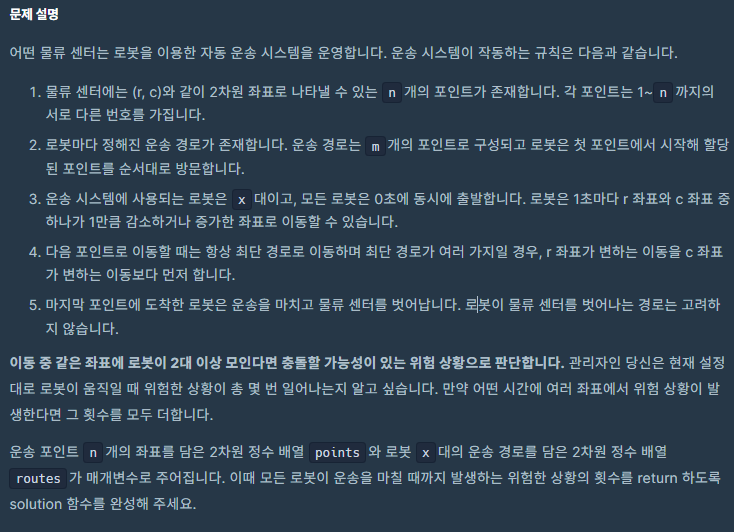

## 입력 출력 및 예제


* 입력

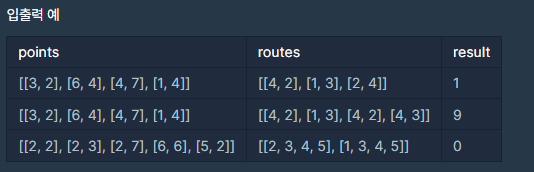

* 출력

* 예제

## 구상

-

## 코드

In [162]:
from collections import Counter
import copy

def padding(pos_list):
    max_len = max(len(lst) for lst in pos_list)
    padded_list = [lst + [[-1,-1]] * (max_len - len(lst)) for lst in pos_list]

    return padded_list

def movement_route(start, end):
    route = []
    x_move = end[0] - start[0]
    y_move = end[1] - start[1]
    cur_pos = start[:]
    # cur_pos = copy.deepcopy(start)

    while abs(x_move) != 0:
        if x_move > 0:
            cur_pos = [cur_pos[0] + 1, cur_pos[1]]
            route.append(cur_pos)
            x_move -= 1
        else:
            cur_pos = [cur_pos[0] - 1, cur_pos[1]]
            route.append(cur_pos)
            x_move += 1

    while abs(y_move) != 0:
        if y_move > 0:
            cur_pos = [cur_pos[0] , cur_pos[1] + 1]
            route.append(cur_pos)
            y_move -= 1
        else:
            cur_pos = [cur_pos[0], cur_pos[1] - 1]
            route.append(cur_pos)
            y_move += 1

    return route

def movement_route(start, end):
    route = []
    x_move = end[0] - start[0]
    y_move = end[1] - start[1]
    cur_pos = start[:]

    while abs(x_move) != 0:
        if x_move > 0:
            cur_pos[0] += 1
            route.append(cur_pos[:])
            x_move -= 1
        else:
            cur_pos[0] -= 1
            route.append(cur_pos[:])
            x_move += 1

    while abs(y_move) != 0:
        if y_move > 0:
            cur_pos[1] += 1
            route.append(cur_pos[:])
            y_move -= 1
        else:
            cur_pos[1] -= 1
            route.append(cur_pos[:])
            y_move += 1

    return route



def robot_pos_list(points, routes):

    pos_list = []
    for route in routes:

        temp_list = list() #

        for i in range(len(route)):

            if i == 0:
                temp_list.append(points[route[i] - 1])

            if i == len(route) - 1:
                break
            s = points[route[i] - 1]
            e = points[route[i + 1] - 1]
            temp_list += movement_route(s,e)
        pos_list.append(temp_list)
    pos_list = padding(pos_list)

    return pos_list

def solution(points, routes):
    answer = 0

    pos_list = robot_pos_list(points, routes)

    for i in range(len(pos_list[0])):
        temp_list = []
        for j in range(len(pos_list)):
            temp_list.append(pos_list[j][i])

        count = Counter(tuple(x) for x in temp_list if x != [-1, -1])
        num_dup_route = sum(1 for v in count.values() if v > 1)
        answer += num_dup_route

    return answer

In [163]:
solution(p,r)

0

In [152]:
p = [[2, 2], [2, 3], [2, 7], [6, 6], [5, 2]]
r = [[2, 3, 4, 5], [1, 3, 4, 5]]

p1 = [[3, 2], [6, 4], [4, 7], [1, 4]]
r1 = [[4, 2], [1, 3], [4, 2], [4, 3]]

p0 = [[3, 2], [6, 4], [4, 7], [1, 4]]
r0 = [[4, 2], [1, 3], [2, 4]]

In [23]:
a = robot_pos_list(p, r)

In [26]:
b = padding(a)
b

[[[1, 4], [2, 4], [3, 4], [4, 4], [5, 4], [6, 4], [-1, -1]],
 [[3, 2], [4, 2], [4, 3], [4, 4], [4, 5], [4, 6], [4, 7]],
 [[6, 4], [5, 4], [4, 4], [3, 4], [2, 4], [1, 4], [-1, -1]]]

In [28]:
b

[[[1, 4], [2, 4], [3, 4], [4, 4], [5, 4], [6, 4], [-1, -1]],
 [[3, 2], [4, 2], [4, 3], [4, 4], [4, 5], [4, 6], [4, 7]],
 [[6, 4], [5, 4], [4, 4], [3, 4], [2, 4], [1, 4], [-1, -1]]]

In [19]:
from collections import Counter

lst = [[3, 2], [3, 2], [3, 2], [1, 1], [1, 1], [1, 2]]

# 1. 리스트의 각 원소를 tuple로 변환해서 카운트
count = Counter(tuple(x) for x in lst)

# 2. 2번 이상 등장한 원소 개수만 세기
num_duplicates = sum(1 for v in count.values() if v > 1)

# 3. 출력 (원한다면 중복된 원소 목록도)
duplicate_elements = [k for k, v in count.items() if v > 1]

print("중복된 원소 개수:", num_duplicates)
print("중복된 원소들:", duplicate_elements)


중복된 원소 개수: 2
중복된 원소들: [(3, 2), (1, 1)]


In [21]:
count.values()

dict_values([3, 2, 1])

### 메모

* 문제의 조건, 입력 등을 잘 읽고 파악하고 넘어가자. 섣불리 예상하고 판단해서 더 돌아갔다.
* 이 문제에서 route는 시작과 끝 뿐만이 아닌. 여러 경로가 있었다. 멍청이

- 이분 탐색!